# HW4: Occupation Dataset

### Introduction:

Special thanks to: https://github.com/guipsamora for sharing his datasets, materials, and questions.

- https://github.com/justmarkham for sharing the dataset and materials.


In [1]:
### Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
### Import the dataset from this address. https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user
### Assign it to a variable called users and use the 'user_id' as index
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', 
                      sep='|', index_col='user_id')

In [3]:
# Problem 1. See the first 10 entries. (done for you)
users.head(10)

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002


In [4]:
# Problem 2. How many observations and columns are in the data?
users

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
...,...,...,...,...
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229


There are 943 observations and 4 columns in this dataset.

In [5]:
# Problem 3. How many different occupations there are in this dataset?
print(len(users.occupation.unique()))

21


There are 21 different occupations.

In [6]:
# Problem 4. What is the most frequent occupation?
users.occupation.describe()

count         943
unique         21
top       student
freq          196
Name: occupation, dtype: object

The most frequent occupation is student.

In [7]:
# Problem 5. Discover what is the mean age per occupation.
# Sort the results and find the 3 occupations with the lowest mean age and the 3 with the highest
ageByOcc = users['age'].groupby(users['occupation'])
dfAgeByOcc = pd.DataFrame(ageByOcc.mean())
dfAgeByOcc.sort_values(by=['age'], inplace=True)
print(dfAgeByOcc)

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

                     age
occupation              
student        22.081633
none           26.555556
entertainment  29.222222
artist         31.392857
homemaker      32.571429
programmer     33.121212
technician     33.148148
other          34.523810
scientist      35.548387
salesman       35.666667
writer         36.311111
engineer       36.388060
lawyer         36.750000
marketing      37.615385
executive      38.718750
administrator  38.746835
librarian      40.000000
healthcare     41.562500
educator       42.010526
doctor         43.571429
retired        63.071429


The 3 occupations with the lowest mean age are: student, none, and entertainment.
The 3 occupations with the highest mean age are: educator, doctor, and retired.

In [92]:
# Problem 6. Find the proportion of males by occupation and sort it from the most to the least
users.groupby(['occupation','gender'])['gender'].count()

occupation     gender
administrator  F          36
               M          43
artist         F          13
               M          15
doctor         M           7
educator       F          26
               M          69
engineer       F           2
               M          65
entertainment  F           2
               M          16
executive      F           3
               M          29
healthcare     F          11
               M           5
homemaker      F           6
               M           1
lawyer         F           2
               M          10
librarian      F          29
               M          22
marketing      F          10
               M          16
none           F           4
               M           5
other          F          36
               M          69
programmer     F           6
               M          60
retired        F           1
               M          13
salesman       F           3
               M           9
scientist      F     

In [9]:
# Problem 7. For each occupation, calculate the minimum and maximum ages
# See groupby and agg() to perform multiple aggregate functions at once


In [10]:
# Problem 8. For each combination of occupation and gender, calculate the mean age.
# Arrange the results in a table so each row is an occupation, and you have a 
# column of the average male age and another column with the average female age.
# Sort the resulting table by Female mean age from least to greatest


In [85]:
# Problem 9. For each occupation find the count of women and men
# Arrange the results in a table so each row is an occupation, similar to above
users.groupby(['occupation','gender'])['gender'].count()

occupation     gender
administrator  F          36
               M          43
artist         F          13
               M          15
doctor         M           7
educator       F          26
               M          69
engineer       F           2
               M          65
entertainment  F           2
               M          16
executive      F           3
               M          29
healthcare     F          11
               M           5
homemaker      F           6
               M           1
lawyer         F           2
               M          10
librarian      F          29
               M          22
marketing      F          10
               M          16
none           F           4
               M           5
other          F          36
               M          69
programmer     F           6
               M          60
retired        F           1
               M          13
salesman       F           3
               M           9
scientist      F     

In [90]:
# Problem 10. Turn the counts above into proportions. e.g administrator 0.455696 0.544304
# Arrange results in increasing order of proportion men
total = users.groupby(['occupation','gender'])['gender'].count()
each = users.groupby(['occupation'])['gender'].count()
prop = (total/each)*100
print(x)

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

<AxesSubplot:xlabel='occupation,gender'>

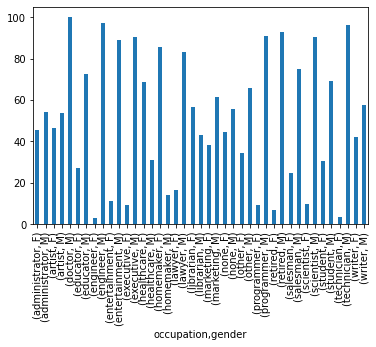

In [91]:
# Create a stacked barchart showing the results above
prop.plot.bar()

In [14]:
# Extract the first digit of each zip code 
# and create a new column called 'region' that maps the
# first digit of the zip to new values using this dictionary:
d = {'0': 'New England',
'1': 'Mid-Atlantic',
'2': 'Central East Coast',
'3': 'The South',
'4': 'Midwest',
'5': 'Northern Great Plains',
'6': 'Central Great Plains',
'7': 'Southern Central',
'8': 'Mountain Desert',
'9': 'West Coast'} 

# print the first 5 rows of the result

In [15]:
# for the occuptation 'retired', find the mean age of each region
